# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

# Create training set and define training dataloader
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


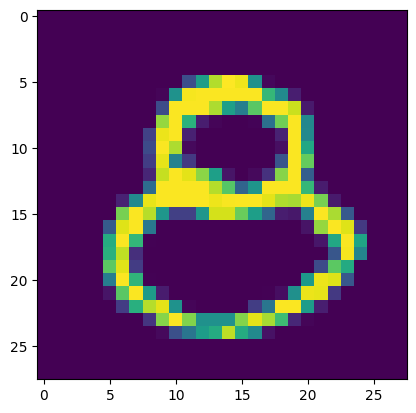

5


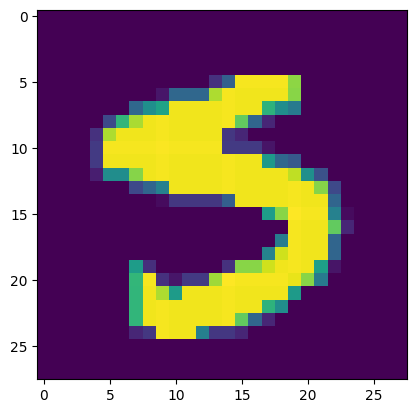

4


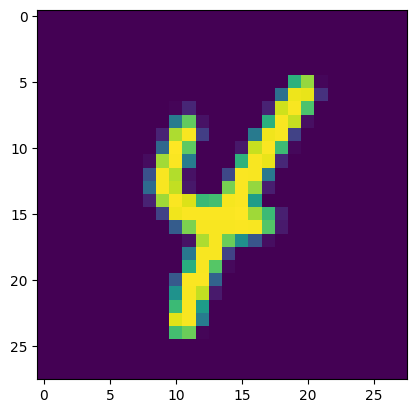

0


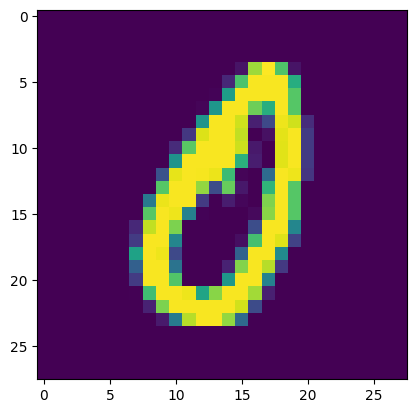

6


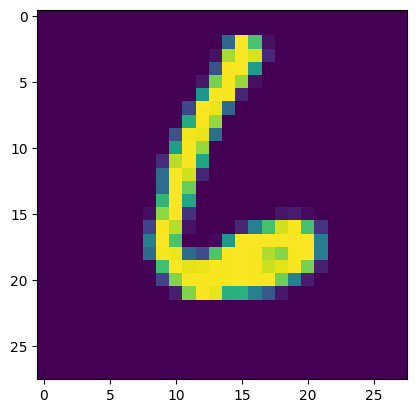

In [5]:
# Explore data
show5(train_loader)

In [6]:
# Print the number of samples in the training and test sets
print(f'Number of training samples: {len(train_dataset)}')
print(f'Number of test samples: {len(test_dataset)}')

# Print the shape of the images
print(f'Image shape: {train_dataset[0][0].shape}')

# Calculate and print the distribution of labels in the training set
train_labels = [label for _, label in train_dataset]
print(f'Training label distribution: {np.bincount(train_labels)}')

Number of training samples: 60000
Number of test samples: 10000
Image shape: torch.Size([1, 28, 28])
Training label distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
## YOUR CODE HERE ##
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
import torch.optim as optim

# Specify the loss function
criterion = nn.NLLLoss()

# Specify the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Instantiate the model
model = Net()


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
# Set the device to run on: GPU if available, else CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Number of epochs to train for
num_epochs = 5

# List to store the average loss at each epoch
epoch_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

        # Print the average loss every 250 mini-batches
        if (i + 1) % 250 == 0:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / (i + 1)}')

    # Calculate and store the average loss for this epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)
    print(f'Epoch {epoch + 1} loss: {epoch_loss}')


[1, 250] loss: 2.3362338943481444
[1, 500] loss: 2.335652376651764
[1, 750] loss: 2.3354753071467083
Epoch 1 loss: 2.335383976446286
[2, 250] loss: 2.3344256811141966
[2, 500] loss: 2.336415955066681
[2, 750] loss: 2.33618200302124
Epoch 2 loss: 2.3353956203216684
[3, 250] loss: 2.333966305732727
[3, 500] loss: 2.335585301399231
[3, 750] loss: 2.3352240200042726
Epoch 3 loss: 2.335379012103782
[4, 250] loss: 2.3372233638763427
[4, 500] loss: 2.3363982219696044
[4, 750] loss: 2.3355554644266765
Epoch 4 loss: 2.3353681399115622
[5, 250] loss: 2.335101806640625
[5, 500] loss: 2.335378629684448
[5, 750] loss: 2.3359390888214113
Epoch 5 loss: 2.335402024071862


Plot the training loss (and validation loss/accuracy, if recorded).

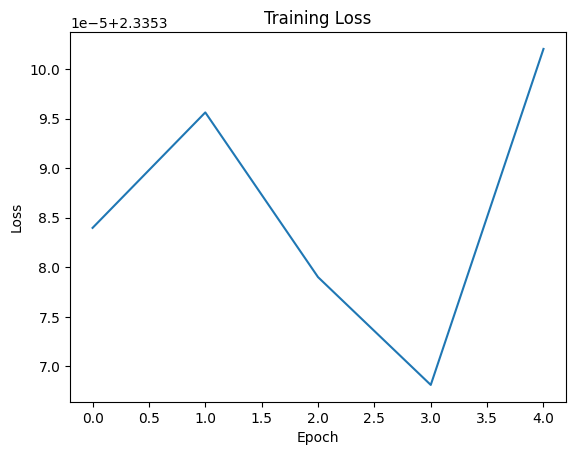

In [10]:
## YOUR CODE HERE ##
import matplotlib.pyplot as plt

plt.plot(epoch_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
correct = 0
total = 0

# Set the model to evaluation mode
model.eval()

with torch.no_grad():
    for data in test_loader:
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}%')


Accuracy: 9.19%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Net()


## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
## YOUR CODE HERE ##
# Specify the path to save the model
model_path = './mnist_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)


To load a saved model, you can use the load_state_dict method of your Net class like this:

In [ ]:
# Create a new instance of the Net class
model = Net()

# Load the saved state dictionary into the model
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()
